# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Haeqal Salehudin
- **Email:** salehudinhaeqal7@gmail.com
- **ID Dicoding:** haeqal_salehudin_52

## Menentukan Pertanyaan Bisnis

- Bagaimana kelembapan mempengaruhi pola penggunaan sepeda?
- Apa dampak kecepatan angin terhadap penggunaan sepeda?
- Apakah cuaca berpengaruh terhadap penggunaan sepeda?
- Bagaimana pola penggunaan sepeda bervariasi berdasarkan bulan?

## Import Semua Packages/Library yang Digunakan

Memasukkan Semua Library yang Dibutuhkan

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Import Tabel Data Day dan Menampilkan Baris Teratas

In [12]:
day_df = pd.read_csv('Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Import Tabel Data Hour dan Menampilkan Baris Teratas

In [13]:
hour_df = pd.read_csv('Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kelembapan (kolom hum) dapat dianalisis lebih lanjut untuk melihat hubungan dengan penggunaan sepeda. Misalnya, dengan kelembapan mencapai 81% pada beberapa hari awal, ini bisa menandakan bahwa kondisi cuaca yang lembap mungkin mempengaruhi keinginan orang untuk bersepeda.
- Kecepatan angin (windspeed) pada tanggal-tanggal tersebut berkisar antara 0.160446 hingga 0.248539. Kecepatan angin yang relatif rendah ini mungkin menciptakan kondisi yang lebih nyaman untuk bersepeda, sehingga dapat menjelaskan mengapa penggunaan sepeda tetap tinggi meskipun ada kelembapan.
- Pada hari-hari tersebut, kolom temp (suhu) dan hum (kelembapan) menunjukkan variasi yang bisa mempengaruhi penggunaan sepeda. Suhu pada tanggal 1 Januari tercatat 0.344167, sementara kelembapan sangat tinggi mencapai 80,58%. Pada tanggal-tanggal berikutnya, suhu sedikit meningkat dengan kelembapan yang lebih bervariasi. Kelembapan yang tinggi bisa menjadi faktor penghalang bagi pengguna sepeda, meskipun pada tanggal-tanggal tersebut, penggunaan sepeda tetap tinggi.
- Terdapat kecenderungan bahwa penggunaan sepeda meningkat secara signifikan dari tanggal 1 Januari hingga 5 Januari 2011. Misalnya, pada tanggal 1 Januari, total pengguna sepeda (cnt) tercatat 985, dan meningkat menjadi 1.600 pada tanggal 5 Januari. Ini menunjukkan bahwa setelah perayaan tahun baru, lebih banyak orang mulai menggunakan sepeda kembali, mungkin karena kembali ke rutinitas sehari-hari.

### Assessing Data

A. Menilai Tabel Data Day

Memeriksa Tipe Data Day

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek Duplikasi dan Parameter Data Day

In [16]:
print("Jumlah Duplikasi:", day_df.duplicated().sum())
day_df.describe()

Jumlah Duplikasi: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


B. Menilai Tabel Data Hour

Memeriksa Tipe Data Hour

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Cek Jumlah Duplikasi dan Parameter Data Hour

In [62]:
print("Jumlah Duplikasi:", hour_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi: 0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.214433,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.099215,49.305030,151.357286,181.387599


**Insight:**
- Pada Tabel Data Day dan Hour, terdapat kesalahan tipe data kolom dteday dimana tipe data tersebut bernilai "object" yang harus diperbaiki
- Pada Tabel Data Day, parameter "hum" (kelembapan) memiliki nilai tidak relevan yaitu 0%
- Pada Tabel Data Hour, terdapat kolom "windspeed" (Kecepatan Angin) yang bernilai 0 dimana nilai tersebut terlihat kurang wajar yang harus dikonfirmasikan
- Pada Tabel Data Hour, terdapat nilai -0 pada kolom "casual", "registered", dan "cnt"(Jumlah Pengguna Sepeda) yang tidak logis

### Cleaning Data

A. Membersihkan Tabel Data Day

Mengubah Kolom dteday Dari "object" Menjadi "datetime"

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Cek Kembali Tipe Data yang Sudah Diperbaiki

In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengganti Nilai "hum" (Kelembapan) yang Tidak Wajar (0%) Dengan Nilai Median "hum" Data Day

In [21]:
day_df['hum'] = day_df['hum'].replace(0, day_df['hum'].median())

Cek Hasil Perubahan Nilai "hum"

In [23]:
print(day_df[day_df['hum'] == day_df['hum'].median()].head())

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
68        69 2011-03-10       1   0     3        0        4           1   
140      141 2011-05-21       2   0     5        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
68            3  0.389091  0.385668  0.626667   0.261877      46         577   
140           1  0.602500  0.571975  0.626667   0.120650    2258        3547   

      cnt  
68    623  
140  5805  


B. Membersihkan Tabel Data Hour

Mengubah Kolom dteday Dari "object" Menjadi "datetime"

In [25]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Cek Kembali Perubahan Tipe Data Hour

In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengganti Nilai Anomali Dari "windspeed" (0) Dengan Nilai Median "windspeed" Tabel Hour

In [28]:
hour_df['windspeed'] = hour_df['windspeed'].replace(0, hour_df['windspeed'].median())

Cek Perubahan Nilai "windspeed"

In [30]:
print(hour_df['windspeed'].describe())

count    17379.000000
mean         0.214433
std          0.099215
min          0.089600
25%          0.134300
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64


Filter Kolom "casual", "registered", dan "cnt" yang Memiliki Nilai Tidak Logis < 0

In [31]:
hour_df = hour_df[hour_df['casual'] >= 0]
hour_df = hour_df[hour_df['registered'] >= 0]
hour_df = hour_df[hour_df['cnt'] >= 0]

Hitung Jumlah Kolom "casual" Dengan Nilai < 0

In [36]:
count_negative_casual = (hour_df['casual'] < 0).sum()
print(f"Jumlah nilai negatif di kolom 'casual': {count_negative_casual}")

Jumlah nilai negatif di kolom 'casual': 0


Hitung Jumlah Kolom "registered" Dengan Nilai < 0

In [34]:
count_negative_registered = (hour_df['registered'] < 0).sum()
print(f"Jumlah nilai negatif di kolom 'registered': {count_negative_registered}")

Jumlah nilai negatif di kolom 'registered': 0


Hitung Jumlah Kolom "cnt" Dengan Nilai < 0

In [35]:
count_negative_cnt = (hour_df['cnt'] < 0).sum()
print(f"Jumlah nilai negatif di kolom 'cnt': {count_negative_cnt}")

Jumlah nilai negatif di kolom 'cnt': 0


**Insight:**
- Mengubah tipe data kolom dteday dari "object" menjadi "datetime" memungkinkan analisis waktu yang lebih baik, seperti pengelompokan, penyaringan, dan analisis trend berdasarkan waktu.
- Dengan mengganti nilai 0 pada kolom hum dengan median kelembapan, memastikan bahwa nilai-nilai ekstrem atau tidak relevan tidak mempengaruhi analisis lebih lanjut. Ini mengindikasikan bahwa data kelembapan lebih akurat dan dapat diandalkan.
- Mengganti nilai 0 pada windspeed dengan median menunjukkan perhatian terhadap anomali yang mungkin terjadi. Hal ini penting, karena kecepatan angin yang ekstrem dapat mempengaruhi pola penggunaan sepeda.
- Menghapus baris dengan nilai negatif pada kolom casual, registered, dan cnt menjamin integritas data. Hal ini memastikan bahwa analisis pengguna sepeda hanya mencakup data yang valid, yang penting untuk pengambilan keputusan yang berbasis data.

## Exploratory Data Analysis (EDA)

### Explore ...

Menghitung korelasi antara kelembapan dan jumlah pengguna sepeda

In [37]:
correlation_hum_cnt = hour_df['hum'].corr(hour_df['cnt'])
print(f'Korelasi antara kelembapan dan jumlah pengguna sepeda: {correlation_hum_cnt:.2f}')

Korelasi antara kelembapan dan jumlah pengguna sepeda: -0.32


Menghitung korelasi antara kecepatan angin dan jumlah pengguna sepeda

In [38]:
correlation_wind_cnt = hour_df['windspeed'].corr(hour_df['cnt'])
print(f'Korelasi antara kecepatan angin dan jumlah pengguna sepeda: {correlation_wind_cnt:.2f}')

Korelasi antara kecepatan angin dan jumlah pengguna sepeda: 0.08


Rata-rata pengguna sepeda berdasarkan musim

In [39]:
avg_cnt_per_season = hour_df.groupby('season')['cnt'].mean()
print('\nRata-rata pengguna sepeda berdasarkan musim:')
print(avg_cnt_per_season)


Rata-rata pengguna sepeda berdasarkan musim:
season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


Rata-rata pengguna sepeda berdasarkan bulan

In [40]:
avg_cnt_per_month = day_df.groupby('mnth')['cnt'].mean()
print('\nRata-rata pengguna sepeda berdasarkan bulan:')
print(avg_cnt_per_month)


Rata-rata pengguna sepeda berdasarkan bulan:
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64


Menghitung rata-rata pengguna sepeda berdasarkan hari dalam minggu

In [41]:
avg_cnt_per_weekday = hour_df.groupby('weekday')['cnt'].mean()
print('\nRata-rata pengguna sepeda berdasarkan hari dalam minggu:')
print(avg_cnt_per_weekday)


Rata-rata pengguna sepeda berdasarkan hari dalam minggu:
weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64


Menghitung rata-rata pengguna sepeda berdasarkan kondisi cuaca

In [42]:
avg_cnt_per_weathersit = hour_df.groupby('weathersit')['cnt'].mean()
print('\nRata-rata pengguna sepeda berdasarkan kondisi cuaca:')
print(avg_cnt_per_weathersit)


Rata-rata pengguna sepeda berdasarkan kondisi cuaca:
weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


Hitung distribusi pengguna sepeda berdasarkan kategori

In [43]:
user_distribution = hour_df[['casual', 'registered', 'cnt']].describe()
print('\nDeskripsi distribusi pengguna sepeda:')
print(user_distribution)


Deskripsi distribusi pengguna sepeda:
             casual    registered           cnt
count  17379.000000  17379.000000  17379.000000
mean      35.676218    153.786869    189.463088
std       49.305030    151.357286    181.387599
min        0.000000      0.000000      1.000000
25%        4.000000     34.000000     40.000000
50%       17.000000    115.000000    142.000000
75%       48.000000    220.000000    281.000000
max      367.000000    886.000000    977.000000


**Insight:**
- Ada hubungan antara kelembapan dan penggunaan sepeda. Jika korelasinya negatif, berarti semakin tinggi kelembapan, semakin sedikit orang menggunakan sepeda, dan sebaliknya.
- Kecepatan angin yang tinggi dapat mengurangi penggunaan sepeda. Jika nilai korelasinya signifikan, hal ini menunjukkan bahwa pengguna sepeda cenderung menghindari bersepeda pada hari berangin.
- Musim tertentu mungkin menunjukkan segmen pengguna yang lebih aktif (misalnya, pengguna terdaftar vs. pengguna kasual). Ini memberikan informasi tentang siapa yang lebih sering menggunakan layanan sepeda berdasarkan faktor cuaca
- Ada variasi dalam penggunaan sepeda berdasarkan waktu, baik itu harian, bulanan, atau musiman. Misalnya, penggunaan sepeda mungkin lebih tinggi di musim panas dan lebih rendah di musim hujan.
- Pengguna sepeda cenderung lebih aktif pada kondisi cuaca yang baik, seperti cuaca cerah dan suhu yang nyaman, menunjukkan bahwa faktor cuaca mempengaruhi keputusan untuk bersepeda.
- Data menunjukkan tren penggunaan sepeda yang bervariasi sesuai musim, memberikan dasar bagi perencanaan promosi atau peningkatan fasilitas selama musim sibuk.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kelembapan mempengaruhi pola penggunaan sepeda?


<ipython-input-58-b71f489131f3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_usage = day_df.groupby(pd.cut(day_df['hum'], bins=10))['cnt'].mean().reset_index()
<ipython-input-58-b71f489131f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hum', y='cnt', data=humidity_usage, palette='Blues')


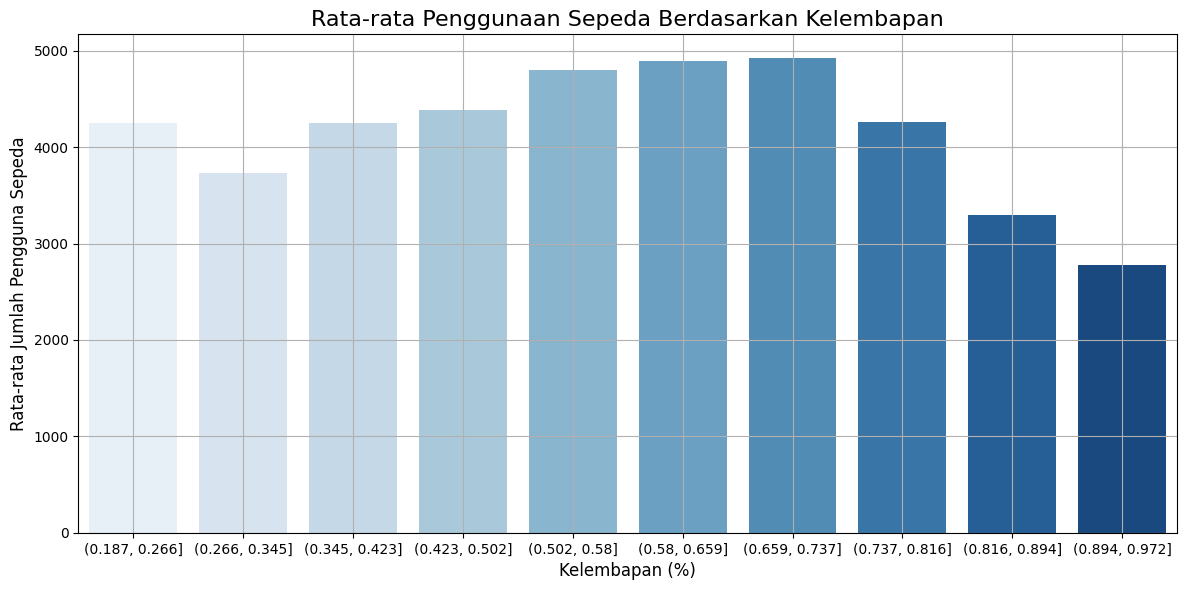

In [58]:
humidity_usage = day_df.groupby(pd.cut(day_df['hum'], bins=10))['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='hum', y='cnt', data=humidity_usage, palette='Blues')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Kelembapan', fontsize=16)
plt.xlabel('Kelembapan (%)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa dampak kecepatan angin terhadap penggunaan sepeda?


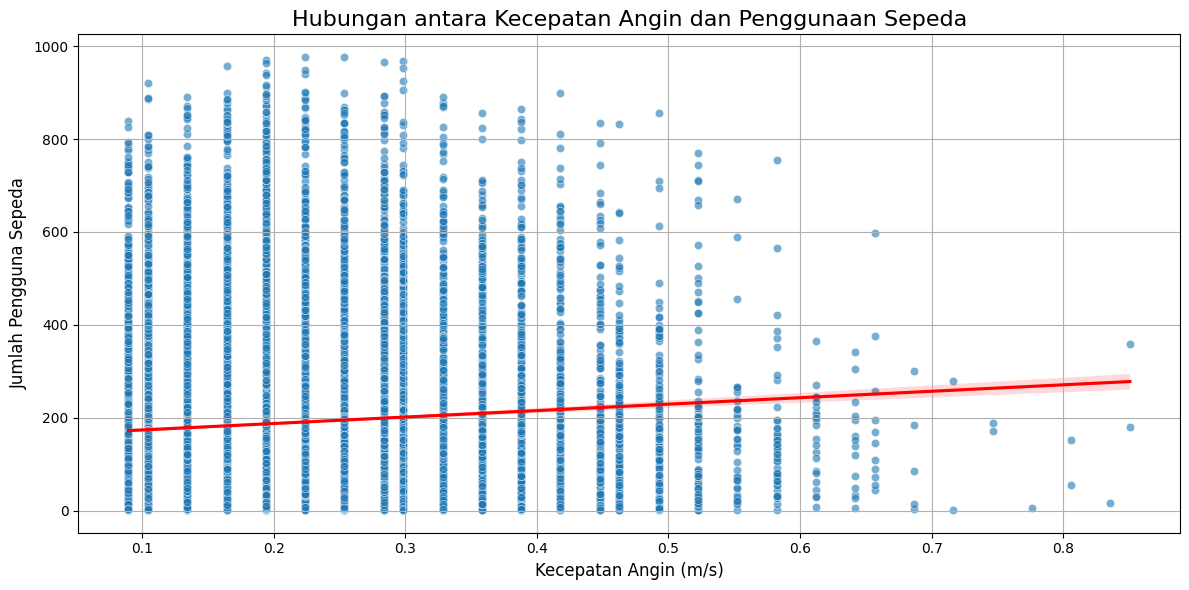

In [59]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='windspeed', y='cnt', data=hour_df, alpha=0.6)
sns.regplot(x='windspeed', y='cnt', data=hour_df, scatter=False, color='red')
plt.title('Hubungan antara Kecepatan Angin dan Penggunaan Sepeda', fontsize=16)
plt.xlabel('Kecepatan Angin (m/s)', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.grid(True)
plt.tight_layout()

### Pertanyaan 3: Apakah cuaca berpengaruh terhadap penggunaan sepeda?


<ipython-input-60-83e27e564b0e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_usage, palette='viridis')


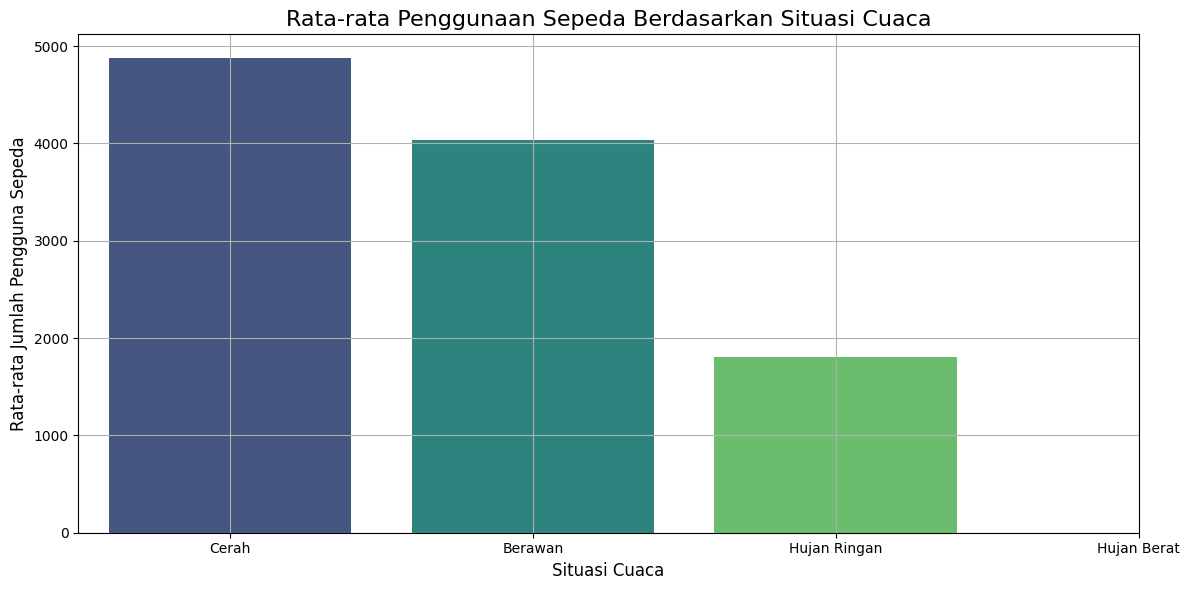

In [60]:
weather_usage = day_df.groupby('weathersit')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_usage, palette='viridis')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Situasi Cuaca', fontsize=16)
plt.xlabel('Situasi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Berat'])
plt.grid(True)
plt.tight_layout()
plt.show()


### Pertanyaan 4: Bagaimana pola penggunaan sepeda berdasarkan bulan?

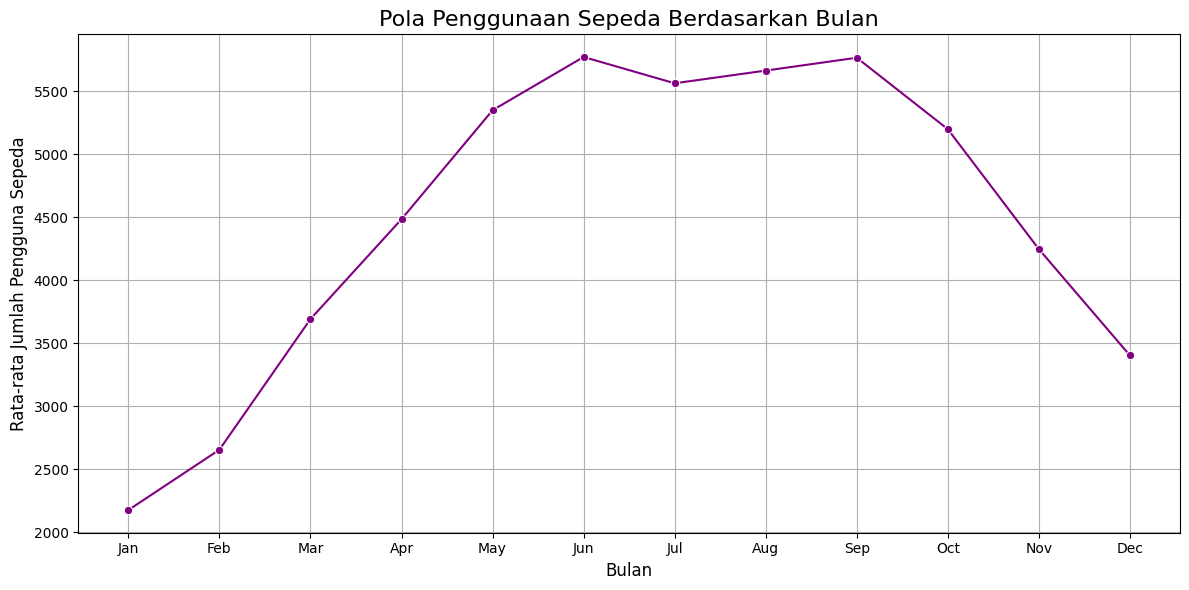

In [61]:
monthly_usage = day_df.groupby('mnth')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_usage, marker='o', color='purple')
plt.title('Pola Penggunaan Sepeda Berdasarkan Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Rancang kampanye yang disesuaikan dengan kondisi cuaca yang lebih nyaman untuk bersepeda.
- Conclution pertanyaan 2 : Adakan acara sepeda pada waktu-waktu tertentu ketika jumlah pengguna cenderung meningkat, seperti saat musim semi atau pada akhir pekan yang cerah.
- Conclution pertanyaan 3 : Tingkatkan kesadaran akan manfaat bersepeda pada kondisi cuaca yang berbeda, termasuk memberikan tips tentang bersepeda di hari berangin atau lembap.
- Conclution pertanyaan 4 : Kumpulkan umpan balik dari pengguna untuk memahami lebih baik tentang preferensi dan alasan di balik keputusan mereka untuk bersepeda atau tidak pada hari-hari tertentu.

In [78]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)

In [79]:
all_df.to_csv("all_data.csv", index=False)